In [1]:
%matplotlib inline

from matplotlib import rc
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imshow, quiver

In [2]:
import numpy as np
from numpy.random import randn

In [3]:
import astromorpho as astro

Can't load imreg package, affine and homography registrations won't work


/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/imfun/external/tifffile.py:7261: UserWarning: No module named 'imfun.external._tifffile'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/imfun/external/czifile.py:146: UserWarning: ImportError: No module named '_czifile'. Decoding of JXR and JPEG encoded images will not be available. Czifile.pyx can be obtained at http://www.lfd.uci.edu/~gohlke/
  warnings.warn(
2022-04-11 13:18:35.096131: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/levtg/astro-morpho/venv/lib/python3.10/site-packages/cv2/../../lib64:
2022-04-11 13:18:35.096154: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machi

In [4]:
import os
import sys

In [5]:
import napari

from tqdm.auto import tqdm
from scipy import ndimage as ndi

## Построение векторов в matplotlib

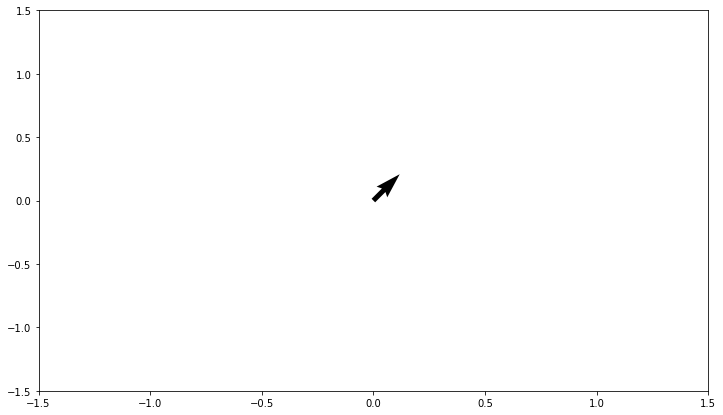

In [6]:
x_position = [0]
y_position = [0]
x_direction = [1]
y_direction = [1]
fig, ax = plt.subplots(figsize = (12,7))
ax.quiver(x_position, y_position, x_direction, y_direction)
ax.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

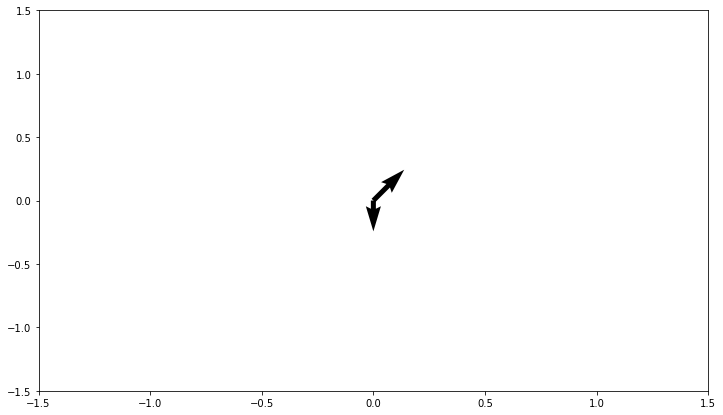

In [7]:
x_position = [0,0]
y_position = [0,0]
x_direction = [1,0]
y_direction = [1,-1]
fig, ax = plt.subplots(figsize = (12,7))
ax.quiver(x_position, y_position, x_direction, y_direction)#, scale = 5)
ax.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

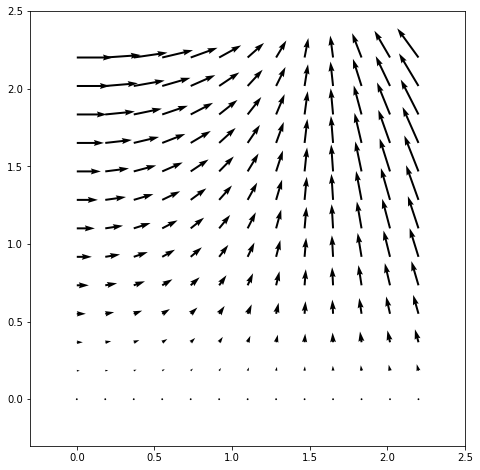

In [8]:
x_position = np.linspace(0, 2.2, 13)
y_position = np.linspace(0, 2.2, 13)
# y_position = [2]
X,Y = np.meshgrid(x_position, y_position)
u=np.cos(X)*Y
v=np.sin(Y)*X
fig, ax = plt.subplots(figsize = (14,8))
m, k, l=0, 14, 1
# ax.quiver(X[m:k:l], Y[m:k:l])#, u[m:k:l], v[m:k:l])
ax.quiver(X, Y, u, v, angles='uv')
ax.axis([-0.3, 2.5, -0.3, 2.5])
ax.set_aspect('equal')
plt.show()

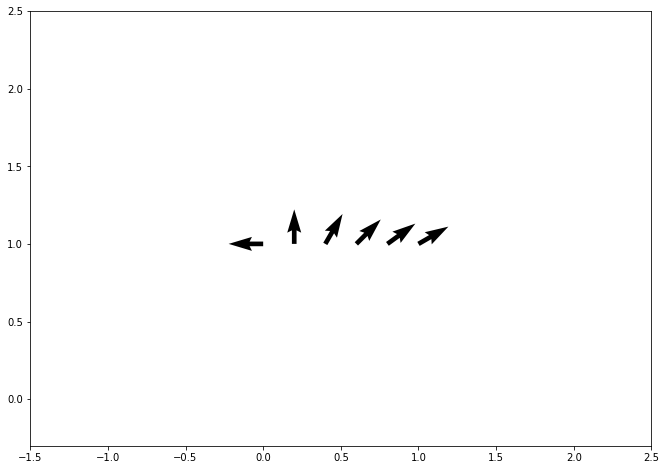

In [9]:
x_position = np.linspace(0, 1, 6)
# y_position = np.linspace(0, 1, 6)
y_position = [1]
X,Y = np.meshgrid(x_position, y_position)
u = np.zeros(X.shape)
u[:] = [np.cos(np.pi/i) for i in range(1, 7)]
v = np.zeros(X.shape)
v[:] = [np.sin(np.pi/i) for i in range(1, 7)]
scale = np.ravel(np.cos(X)*Y)*2.
fig, ax = plt.subplots(figsize = (14,8))
ax.quiver(X, Y, u, v,)#, scale=scale, scale_units='inches')
ax.axis([-1.5, 2.5, -0.3, 2.5])
ax.set_aspect('equal')
plt.show()

## Построение векторов в napari

In [10]:
# sample vector coord-like data
n = 200
pos = np.zeros((n, 2, 2), dtype=np.float32)
phi_space = np.linspace(0, 4 * np.pi, n)
radius_space = np.linspace(0, 20, n)

# assign x-y position
pos[:, 0, 0] = radius_space * np.cos(phi_space)# + 64
pos[:, 0, 1] = radius_space * np.sin(phi_space)# + 64

# assign x-y projection
pos[:, 1, 0] = radius_space * np.cos(phi_space)
pos[:, 1, 1] = radius_space * np.sin(phi_space)

planes = np.round(np.linspace(0, 128, n)).astype(int)
planes = np.concatenate(
    (planes.reshape((n, 1, 1)), np.zeros((n, 1, 1))), axis=1
)
vectors = np.concatenate((planes, pos), axis=2)

# add the sliced vectors
layer = napari.view_vectors(
    vectors, edge_width=0.4, name='sliced vectors', edge_color='blue'
)

layer.dims.ndisplay = 3

napari.run()

In [11]:
n = 1
pos = np.zeros((n, 2, 2))
phi = np.pi/4
radius = 1

pos[:, 0, 0] = radius * np.cos(phi)
pos[:, 0, 1] = radius * np.sin(phi)

pos[:, 1, 0] = radius * np.cos(phi)
pos[:, 1, 1] = radius * np.sin(phi)

planes = np.round([0]).astype(int)
planes = np.concatenate(
    (planes.reshape((n, 1, 1)), np.zeros((n, 1, 1))), axis=1
)
vectors = np.concatenate((planes, pos), axis=2)


napari.view_vectors(vectors, edge_width=0.4, name='sliced vectors', edge_color='blue')
layer.dims.ndisplay = 3

napari.run()

Добавим границы по сетке чтобы был фон  были видны границы изображения в целом

In [12]:
rect = np.zeros((4,3))
rect[0] = [0, 0, 0]
rect[1] = [1, 0, 0]
rect[2] = [1, 1, 0]
rect[3] = [0, 1, 0]

rect1 = np.zeros((4,3))
rect1[0] = [0, 0, 0]
rect1[1] = [0, 1, 0]
rect1[2] = [0, 1, 1]
rect1[3] = [0, 0, 1]

rect2 = np.zeros((4,3))
rect2[0] = [0, 0, 0]
rect2[1] = [1, 0, 0]
rect2[2] = [1, 0, 1]
rect2[3] = [0, 0, 1]

In [13]:
viewer = napari.view_shapes(rect, face_color='white',
                            edge_width=0,
                            name='bounding box')
viewer.add_shapes(rect1, face_color='white',
                            edge_width=0,
                            name='bounding box')
viewer.add_shapes(rect2, face_color='white',
                            edge_width=0,
                            name='bounding box')

/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


<Shapes layer 'bounding box [2]' at 0x7f9a8ffbb310>

In [14]:
arr = np.zeros((4,2,3))
arr[0] = [[0, 0, 0], [1, 1, 1]]
arr[1] = [[0, 0, 0], [1, 0, 0]]
arr[2] = [[0, 0, 0], [0, 0, 1]]
viewer.add_vectors(arr, edge_width=0.2, name='sliced vectors', edge_color='blue')

<Vectors layer 'sliced vectors' at 0x7f9a8e2d8070>

## Тестовая картинка

### Линии

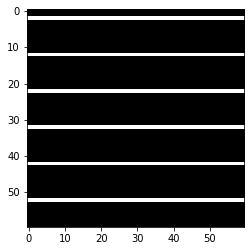

In [30]:
img_lines = np.zeros((100,100))
img_lines[2::10] = 1
# img_lines[23:78,50:52] = 1
# img_lines = ndi.rotate(img_lines, 24)
img_lines = img_lines[20:-20,20:-20]

img_lines = np.clip(img_lines, 0, 1)
crop = (slice(20,-20), slice(20,-20))
img = img_lines
imshow(img, cmap='gray', interpolation='nearest')

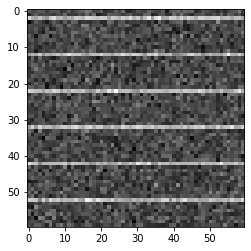

In [16]:
SNR = 5
img_noisy = SNR*img + randn(*img.shape)
imshow(img_noisy, cmap='gray',interpolation='nearest')

### Повернутый крест

In [17]:
img_cross = np.zeros((100,100))
img_cross[50:52, 23:78] = 1
img_cross[23:78,50:52] = 1
img_cross = ndi.rotate(img_cross, 24)
img_cross = img_cross[20:-20,20:-20]

img_cross = np.clip(img_cross, 0, 1)
crop = (slice(20,-20), slice(20,-20))
img = img_cross[crop]

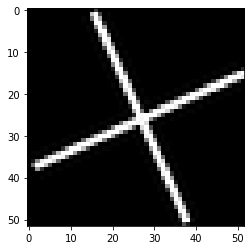

In [18]:
# figure()
imshow(img, cmap='gray', interpolation='nearest')

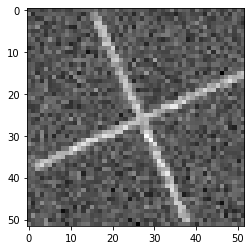

In [19]:
SNR = 5
img_noisy = SNR*img + randn(*img.shape)
imshow(img_noisy, cmap='gray',interpolation='nearest')

### 3D изображение

In [34]:
img_3d = np.zeros((100, 100, 100))
img_3d[50:52:10, 23:78:10] = 1
img_3d[23:78:10, 50:52:10] = 1
img_3d = ndi.rotate(img_3d, 24)
img_3d = img_3d[20:-20,20:-20]


img_3d = np.clip(img_3d, 0, 1)
crop = (slice(20,-20), slice(20,-20))
img = img_3d[crop]

In [35]:
napari.view_image(img)
napari.run()

In [36]:
SNR = 5
img_noisy = SNR*img + randn(*img.shape)

## Вектора Матрицы Гессе

Только для двумерных изображений

In [20]:
sigma = 1

In [21]:
sato, Vf = astro.hessian.sato2d(img_noisy, sigma, hessian_variant='gradient_of_smoothed', return_vectors=True)

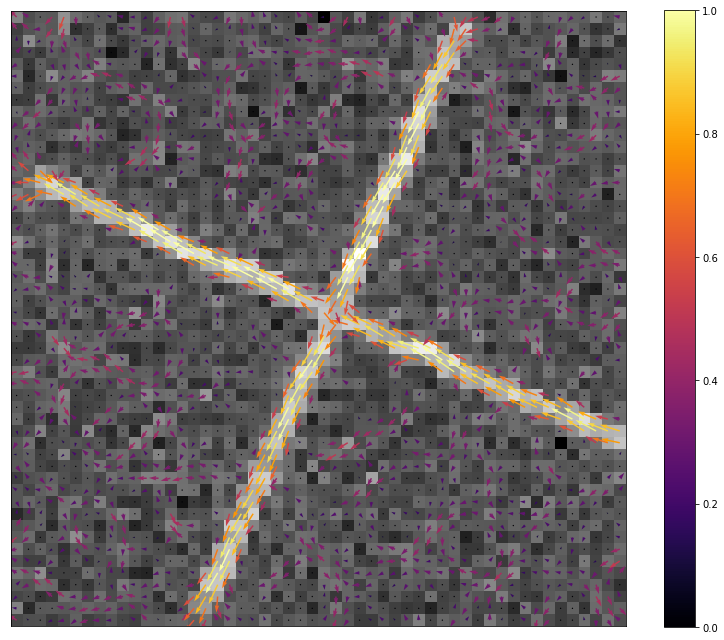

In [22]:
plt.figure(figsize=(11,9))
imshow(img_noisy,cmap='gray', origin='lower')

#lamc = lam[crop]
#mask = (lam[...,0] < 0) & ((lam[...,1] <= 0) | (lam[...,1] < np.abs(lam[...,0])/0.5))
#weights = percentile_rescale(np.abs(lam[...,0]))*mask
weights = astro.enh.percentile_rescale(sato)**0.5
#weights = skimage.filters.sato(imgx,[sigma],black_ridges=False)[crop]


i = 0
Vfx = Vf[...,i][...,::-1]

V = Vfx[...,0] # row directions (Y)
U = Vfx[...,1] # col directions (X)
#V,U = Vf[crop][...,0]
plt.setp(plt.gca(), xticks=[],yticks=[])
# h = quiver(U*weights, V*weights, weights, scale=25, cmap='inferno')
h = quiver(U*weights, V*weights, weights, scale=25, cmap='inferno')
plt.colorbar(h, ax=plt.gca())
#quiver(U*weights,V*weights,color='m', scale=100,)
plt.tight_layout()

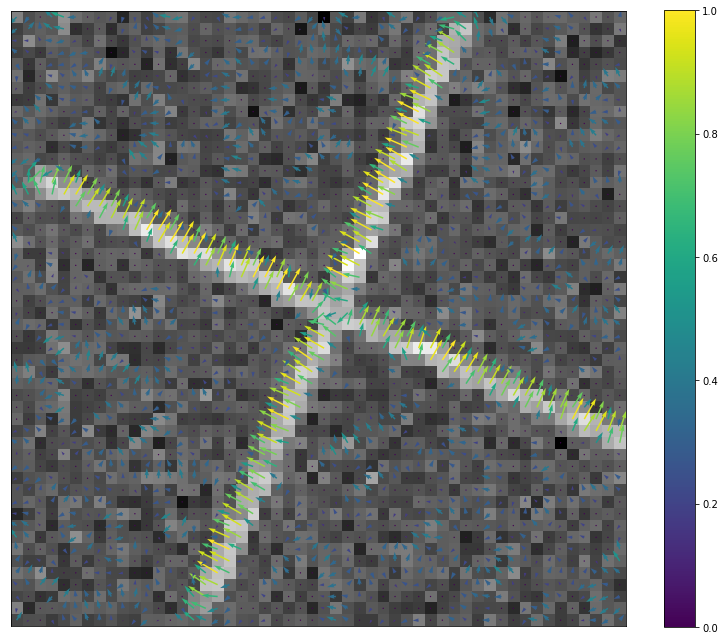

In [23]:
plt.figure(figsize=(11,9))
imshow(img_noisy, cmap='gray', origin='lower')

#lamc = lam[crop]
#mask = (lam[...,0] < 0) & ((lam[...,1] <= 0) | (lam[...,1] < np.abs(lam[...,0])/0.5))
#weights = percentile_rescale(np.abs(lam[...,0]))*mask
weights = astro.enh.percentile_rescale(sato)**0.5
#weights = skimage.filters.sato(imgx,[sigma],black_ridges=False)[crop]


i = 1
Vfy = Vf[...,i][...,::-1]

V = Vfy[...,0] # row directions (Y)
U = Vfy[...,1] # col directions (X)
#V,U = Vf[crop][...,0]
plt.setp(plt.gca(), xticks=[],yticks=[])
h = quiver(U*weights,V*weights,weights,scale=25,cmap='viridis')
plt.colorbar(h, ax=plt.gca())
#quiver(U*weights,V*weights,color='m', scale=100,)
plt.tight_layout()

## Построение собственных векторов в напари

- Начальные позиции: x, y
- Направления: u, v
- Длины: weights -> length
- Конечные позиции: x1, y1

### 2D изображение

In [24]:
sigma = 1

In [25]:
sato, Vf = astro.hessian.sato2d(img_noisy, sigma, hessian_variant='gradient_of_smoothed', return_vectors=True)

In [26]:
weights = astro.enh.percentile_rescale(sato)**0.5

i = 0
Vfx = Vf[...,i][...,::-1]

V = Vfx[...,0] # row directions (Y)
U = Vfx[...,1] # col directions (X)

In [27]:
nr, nc = (1, U.shape[0]) if U.ndim == 1 else U.shape
indexgrid = np.meshgrid(np.arange(nc), np.arange(nr))
x, y = [np.ravel(a) for a in indexgrid]

In [28]:
u = U.ravel()
v = V.ravel()
length = weights.ravel()

Каждый вектор получая начальную точку начинает считать от неё. Поэтому для определения конца вектора достаточно указать его относительно самого вектора

In [29]:
x1, y1 = u*length, v*length

Вектора отображаются транспонировано. Хз почему. Поэтому меняем местами х и у

In [30]:
vectors = np.zeros((u.shape[0], 2, 2))
vectors[...,0, 0] = y
vectors[...,0, 1] = x
vectors[...,1, 0] = y1
vectors[...,1, 1] = x1

In [31]:
list(napari.utils.colormaps.AVAILABLE_COLORMAPS)

['PiYG',
 'blue',
 'bop blue',
 'bop orange',
 'bop purple',
 'cyan',
 'gist_earth',
 'gray',
 'gray_r',
 'green',
 'hsv',
 'inferno',
 'magenta',
 'magma',
 'plasma',
 'red',
 'turbo',
 'twilight',
 'twilight_shifted',
 'viridis',
 'yellow']

In [32]:
length.shape

(2704,)

In [33]:
viewer = napari.view_image(img_noisy)

properties = {'length': length}

viewer.add_vectors(vectors, edge_width=0.2, 
                   length=1,  properties=properties,
                   edge_color='length', edge_colormap='inferno')
napari.run()

### 3D изображение

In [40]:
sigma = 1

In [37]:
sato, Vf = astro.hessian.sato3d(img_noisy, sigma, hessian_variant='gradient_of_smoothed', return_vectors=True)

In [38]:
weights = astro.enh.percentile_rescale(sato)**0.5

i = 0
Vfx = Vf[...,i][...,::-1]

V = Vfx[...,0] # row directions (Y)
U = Vfx[...,1] # col directions (X)
C = Vfx[...,2]

In [39]:
nr, nc, nd = (1, U.shape[0]) if U.ndim == 1 else U.shape
indexgrid = np.meshgrid(np.arange(nc), np.arange(nr), np.arange(nd))
x, y, z = [np.ravel(a) for a in indexgrid]

In [40]:
u = U.ravel()
v = V.ravel()
c = C.ravel()
length = weights.ravel()

In [41]:
x1, y1, z1 = u*length, v*length, c*length

In [42]:
vectors = np.zeros((u.shape[0], 2, 3))
vectors[...,0, 0] = y
vectors[...,0, 1] = x
vectors[...,0, 2] = z
vectors[...,1, 0] = y1
vectors[...,1, 1] = x1
vectors[...,1, 2] = z1

In [43]:
viewer = napari.view_image(img_noisy)

properties = {'length': length}

viewer.add_vectors(vectors, edge_width=0.1, 
                   length=1,  properties=properties,
                   edge_color='length', edge_colormap='inferno')
napari.run()

### С помощью написанной функции (для всех изображений)

In [48]:
import hessian_vectors as hv

In [55]:
sato, Vf = astro.hessian.sato2d(img_noisy, sigma, hessian_variant='gradient_of_smoothed', return_vectors=True)

In [41]:
sato, Vf = astro.hessian.sato3d(img_noisy, sigma, hessian_variant='gradient_of_smoothed', return_vectors=True)

In [64]:
viewer = napari.view_image(img_noisy)
hv.plot_from_sato(viewer, sato, Vf)
napari.run()

# Построение точек с текстом в napari

In [12]:
text_parameters = {
    'string': 'lll{label}',
    'size': 12,
    'color': 'yellow',
    'anchor': 'upper_left',
#     'translation': [-3, 0]
}

In [13]:
napari.view_points(
        np.asarray([0,1]),
        face_color='transparent',
        edge_color='yellow',
        properties={'label': 'ababab'},
        name='text point',
        text=text_parameters,
    )

/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 0.0, 1.0), zoom=1263.5, angles=(0.0, 0.0, 90.0), perspective=0, interactive=True), cursor=Cursor(position=(1, 1), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0.0, 1.0, 1.0), (1.0, 2.0, 1.0)), current_step=(0, 0), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Points layer 'text point' at 0x7f63339b3fa0>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=False, show_handle=False, show_vertices=False, selection_box_drag=None, selection_box_final=None, tr

In [16]:
bbox_rects = np.array([[0,0], [0,1], [1,1], [1,0]])

In [24]:
text_params = {
    'string': 'this is label',
    'size': 250,
    'color': 'yellow',
    'anchor': 'upper_left',
    'translation': [-3, 0]
}

In [26]:
shapes_layer = napari.view_shapes(
        bbox_rects,
        face_color='transparent',
        edge_color='green',
        name='bounding box',
        text=text_params        
    )

/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [34]:
import napari
from magicgui.widgets import ComboBox, Container
import numpy as np
from skimage import data


# set up the annotation values and text display properties
box_annotations = ['person', 'sky', 'camera']
text_property = 'box_label'
text_color = 'green'

def create_label_menu(shapes_layer, label_property, labels):
    """Create a label menu widget that can be added to the napari viewer dock

    Parameters:
    -----------
    shapes_layer : napari.layers.Shapes
        a napari shapes layer
    label_property : str
        the name of the shapes property to use the displayed text
    labels : List[str]
        list of the possible text labels values.

    Returns:
    --------
    label_widget : magicgui.widgets.Container
        the container widget with the label combobox
    """
    # Create the label selection menu
    label_menu = ComboBox(label='text label', choices=labels)
    label_widget = Container(widgets=[label_menu])

    def update_label_menu(event):
        """This is a callback function that updates the label menu when
        the current properties of the Shapes layer change
        """
        new_label = str(shapes_layer.current_properties[label_property][0])
        if new_label != label_menu.value:
            label_menu.value = new_label

    shapes_layer.events.current_properties.connect(update_label_menu)

    def label_changed(event):
        """This is acallback that update the current properties on the Shapes layer
        when the label menu selection changes
        """
        selected_label = event.value
        current_properties = shapes_layer.current_properties
        current_properties[label_property] = np.asarray([selected_label])
        shapes_layer.current_properties = current_properties

    label_menu.changed.connect(label_changed)

    return label_widget



viewer = napari.view_image(data.camera())
shapes = viewer.add_shapes(properties={text_property: box_annotations})
shapes.text = 'box_label'

# create the label section gui
label_widget = create_label_menu(
    shapes_layer=shapes,
    label_property=text_property,
    labels=box_annotations
)
# add the label selection gui to the viewer as a dock widget
viewer.window.add_dock_widget(label_widget, area='right')

# set the shapes layer mode to adding rectangles
shapes.mode = 'add_rectangle'

# this is a hack to get around a bug we currently have for creating emtpy layers with text
# see: https://github.com/napari/napari/issues/2115
def on_data(event):
    if shapes.text.mode == 'none':
        shapes.text = text_property
        shapes.text.color = text_color
shapes.events.set_data.connect(on_data)

ValueError: Length of values (3) does not match length of index (0)